In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import sklearn
import numpy as np

In [2]:
df = pd.read_csv('dataset.csv', sep = ";") #base de dados

In [3]:
df.head(5)

,Município,neventos,popresidente,eventos1000hab,%ev/pop,txanalf,txdesemp,indpcomp,%popid(15-65),medenf,medenf/pop
0,Arcos de Valdevez,44,22847,1.9,0.002,12.6,10.2,62.0,0.58,50,0.002
1,Caminha,11,16684,0.7,0.001,4.3,13.1,81.8,0.64,38,0.002
2,Melgaço,5,9213,0.5,0.001,9.5,9.7,62.5,0.54,26,0.003
3,Monção,26,19230,1.4,0.001,8.1,9.8,69.4,0.61,34,0.002
4,Paredes de Coura,17,9198,1.8,0.002,11.4,11.1,59.3,0.61,20,0.002


In [4]:
df["medenf1000hab"] = df["medenf"]/(df["popresidente"]/1000)

In [5]:
df

,Município,neventos,popresidente,eventos1000hab,%ev/pop,txanalf,txdesemp,indpcomp,%popid(15-65),medenf,medenf/pop,medenf1000hab
0,Arcos de Valdevez,44,22847,1.9,0.002,12.6,10.2,62.0,0.58,50,0.002,2.188471
1,Caminha,11,16684,0.7,0.001,4.3,13.1,81.8,0.64,38,0.002,2.277631
2,Melgaço,5,9213,0.5,0.001,9.5,9.7,62.5,0.54,26,0.003,2.822099
3,Monção,26,19230,1.4,0.001,8.1,9.8,69.4,0.61,34,0.002,1.768071
4,Paredes de Coura,17,9198,1.8,0.002,11.4,11.1,59.3,0.61,20,0.002,2.174386
...,...,...,...,...,...,...,...,...,...,...,...,...
303,Ribeira Brava,37,13375,2.8,0.003,12.5,12.9,65.1,0.66,50,0.004,3.738318
304,Santa Cruz,66,43005,1.5,0.002,4.1,13.0,73.5,0.71,82,0.002,1.906755
305,Santana,24,7719,3.1,0.003,13.8,14.8,54.8,0.63,52,0.007,6.736624
306,São Vicente,12,5723,2.1,0.002,13.0,11.7,59.6,0.63,47,0.008,8.212476


In [6]:
df.neventos.sum()

23732

In [7]:
df.neventos.sum()/df.popresidente.sum()

0.002246885064803869

In [8]:
2582/23732

0.10879824709253329

In [9]:
df.describe()

,neventos,popresidente,eventos1000hab,%ev/pop,txanalf,txdesemp,indpcomp,%popid(15-65),medenf,medenf/pop,medenf1000hab
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,77.051948,34292.785714,1.943831,0.001948,8.157468,12.387013,77.357143,0.630260,51.935065,0.001883,1.918728
std,155.107036,56059.483845,1.015480,0.001026,3.791372,2.950718,20.805139,0.046952,75.485545,0.001024,0.944923
min,0.000000,430.000000,0.000000,0.000000,2.200000,5.100000,49.800000,0.480000,0.000000,0.000000,0.000000
25%,11.000000,7268.750000,1.300000,0.001000,5.100000,10.100000,63.100000,0.607500,15.000000,0.001000,1.390017
50%,25.000000,14634.000000,1.800000,0.002000,7.500000,12.100000,72.050000,0.630000,28.000000,0.002000,1.677154
75%,77.250000,36819.250000,2.400000,0.002000,10.900000,14.300000,86.800000,0.660000,55.500000,0.002000,2.175913
max,1388.000000,547733.000000,7.400000,0.007000,20.600000,22.900000,216.900000,0.720000,754.000000,0.008000,8.212476


In [10]:
df.dtypes

Município          object
neventos            int64
popresidente        int64
eventos1000hab    float64
%ev/pop           float64
txanalf           float64
txdesemp          float64
indpcomp          float64
%popid(15-65)     float64
medenf              int64
medenf/pop        float64
medenf1000hab     float64
dtype: object

<AxesSubplot:xlabel='eventos1000hab'>

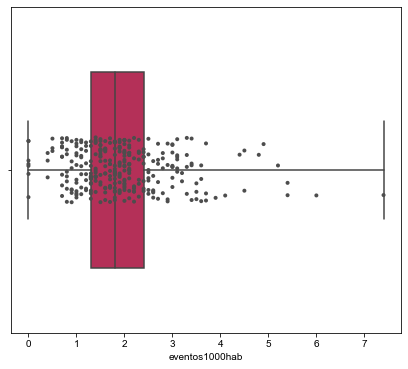

In [11]:
f, ax = plt.subplots(figsize=(7, 6))
sns.set(font_scale=1)
# Plot the orbital period with horizontal boxes
sns.boxplot(x="eventos1000hab", data=df,
            whis=[0, 100], width=.6, palette='rocket_r')

#Add in points to show each observation
sns.stripplot(x="eventos1000hab", data=df,
              size=4, color=".3", linewidth=0)

<AxesSubplot:xlabel='eventos1000hab', ylabel='Count'>

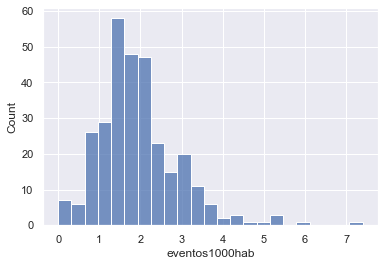

In [12]:
sns.histplot(data=df, x="eventos1000hab")

In [13]:
df9 = df[['txdesemp', 'indpcomp', '%popid(15-65)',  'medenf/pop']]
corrm9 = df9.corr()

In [14]:
corrm = df.corr()

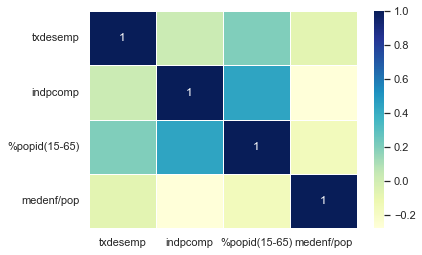

In [15]:
plt.figure(figsize=(6,4))
ax = sns.heatmap(corrm9, annot=True, linewidths=.5, cmap="YlGnBu")

for t in ax.texts:
    if float(t.get_text())>=0.5 or float(t.get_text())<-0.5:
        t.set_text(t.get_text()) #if the value is greater than 0.4 then I set the text 
    else:
        t.set_text("") # if not it sets an empty text

plt.show()

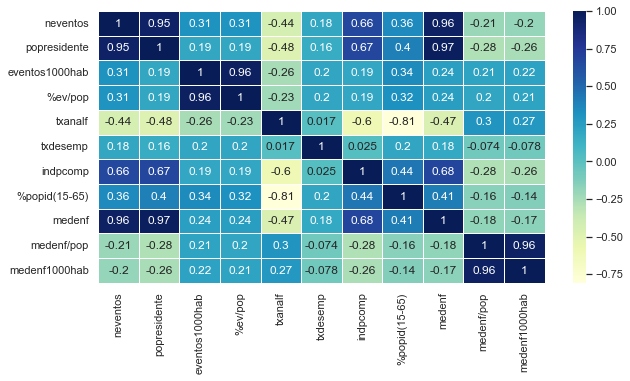

In [16]:
plt.figure(figsize=(10,5))
ax = sns.heatmap(corrm, annot=True, linewidths=.5, cmap="YlGnBu")

In [17]:
df.columns

Index(['Município', 'neventos', 'popresidente', 'eventos1000hab', '%ev/pop',
       'txanalf', 'txdesemp', 'indpcomp', '%popid(15-65)', 'medenf',
       'medenf/pop', 'medenf1000hab'],
      dtype='object')

In [18]:
df.sort_values("eventos1000hab", ascending = False, inplace = True)
df
df1 = df.head(20)
df1



,Município,neventos,popresidente,eventos1000hab,%ev/pop,txanalf,txdesemp,indpcomp,%popid(15-65),medenf,medenf/pop,medenf1000hab
63,Mesão Frio,33,4433,7.4,0.007,10.3,17.8,57.8,0.66,9,0.002,2.030228
279,Lagoa [R.A.A.],87,14442,6.0,0.006,4.7,13.6,67.3,0.69,24,0.002,1.661820
31,Porto,1277,237591,5.4,0.005,2.8,17.6,161.7,0.65,431,0.002,1.814042
281,Ponta Delgada,370,68809,5.4,0.005,3.5,12.0,104.3,0.71,153,0.002,2.223546
295,Santa Cruz das Flores,12,2289,5.2,0.005,3.9,7.9,80.8,0.68,18,0.008,7.863696
284,Vila Franca do Campo,55,11229,4.9,0.005,8.5,15.6,59.2,0.69,46,0.004,4.096536
302,Porto Moniz,13,2711,4.8,0.005,13.1,10.7,52.9,0.63,15,0.006,5.533014
280,Nordeste,22,4937,4.5,0.004,6.6,10.8,55.9,0.65,19,0.004,3.848491
283,Ribeira Grande,146,32112,4.5,0.005,6.7,14.3,63.3,0.68,88,0.003,2.740409
180,Manteigas,15,3430,4.4,0.004,8.8,14.8,61.5,0.61,10,0.003,2.915452


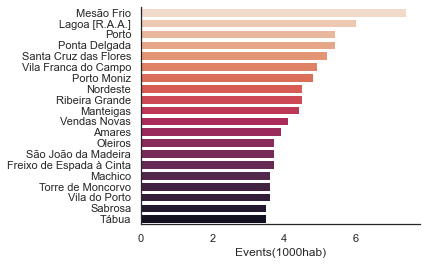

In [19]:
plt.figure(figsize=(5,4))

sns.set_theme()
sns.set_style("white")


sns.barplot(x = df1["eventos1000hab"], y= df1["Município"], palette = 'rocket_r', order=df1.sort_values('eventos1000hab', ascending = False)['Município'])
#sns.barplot(x = df1["txanalf"], y= df1["Município"])
sns.set_context("poster")
#plt.title("Crimes registed by Police (2011) \n Domestic violence - TOP 10 Counties", fontsize=10, fontweight = "bold")
plt.xlabel("Events(1000hab)")
plt.ylabel(None)

sns.despine()
sns.set_context("poster")

#plt.savefig('plot1.jpeg', dpi=500)

In [20]:
df.sort_values("txanalf", ascending = False, inplace = True)
df
df1 = df.head(20)
df1


,Município,neventos,popresidente,eventos1000hab,%ev/pop,txanalf,txdesemp,indpcomp,%popid(15-65),medenf,medenf/pop,medenf1000hab
153,Idanha-a-Nova,15,9716,1.5,0.002,20.6,11.9,61.3,0.48,20,0.002,2.058460
155,Penamacor,10,5682,1.8,0.002,20.2,11.0,54.5,0.49,13,0.002,2.287927
263,Alcoutim,3,2917,1.0,0.001,19.2,8.8,59.9,0.48,9,0.003,3.085362
243,Monforte,0,3329,0.0,0.000,17.3,15.1,64.0,0.57,9,0.003,2.703515
234,Arronches,3,3165,0.9,0.001,16.5,14.4,68.1,0.56,9,0.003,2.843602
84,Vimioso,6,4669,1.3,0.001,16.1,10.4,54.4,0.53,14,0.003,2.998501
219,Ourique,0,5389,0.0,0.000,15.9,12.6,65.9,0.57,14,0.003,2.597885
122,Pampilhosa da Serra,3,4481,0.7,0.001,15.9,9.5,56.3,0.51,9,0.002,2.008480
44,Ribeira de Pena,9,6544,1.4,0.001,15.8,15.6,50.8,0.61,12,0.002,1.833741
41,Boticas,6,5750,1.0,0.001,15.8,9.2,52.6,0.58,13,0.002,2.260870


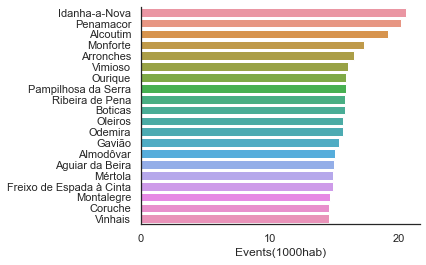

In [21]:
plt.figure(figsize=(5,4))

sns.set_theme()
sns.set_style("white")


sns.barplot(x = df1["txanalf"], y= df1["Município"])
sns.set_context("poster")
#plt.title("Crimes registed by Police (2011) \n Domestic violence - TOP 10 Counties", fontsize=10, fontweight = "bold")
plt.xlabel("Events(1000hab)")
plt.ylabel(None)

sns.despine()
sns.set_context("poster")

#plt.savefig('plot1.jpeg', dpi=500)

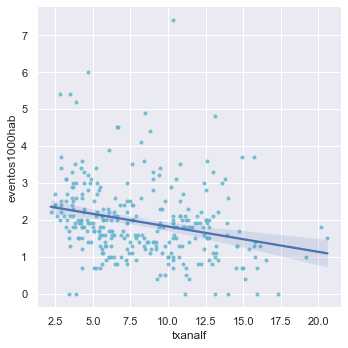

In [22]:
sns.set(font_scale=1)
sns.lmplot( x = 'txanalf', y = 'eventos1000hab', data=df,
               markers=".", scatter_kws=dict(color='c'))

<AxesSubplot:xlabel='medenf1000hab'>

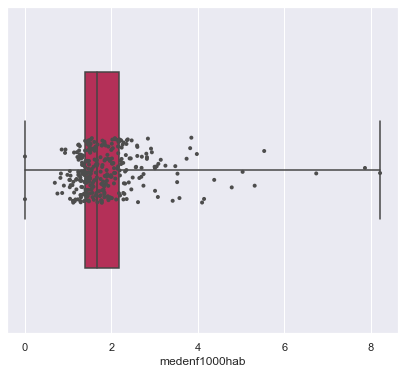

In [23]:
f, ax = plt.subplots(figsize=(7, 6))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="medenf1000hab", data=df,
            whis=[0, 100], width=.6, palette='rocket_r')

#Add in points to show each observation
sns.stripplot(x="medenf1000hab", data=df,
              size=4, color=".3", linewidth=0)

In [24]:
y = df["eventos1000hab"]
x = df[['txdesemp', '%popid(15-65)', 'medenf1000hab']]

sc = df[["eventos1000hab", 'txdesemp', 'indpcomp', '%popid(15-65)',  'medenf1000hab' ]]

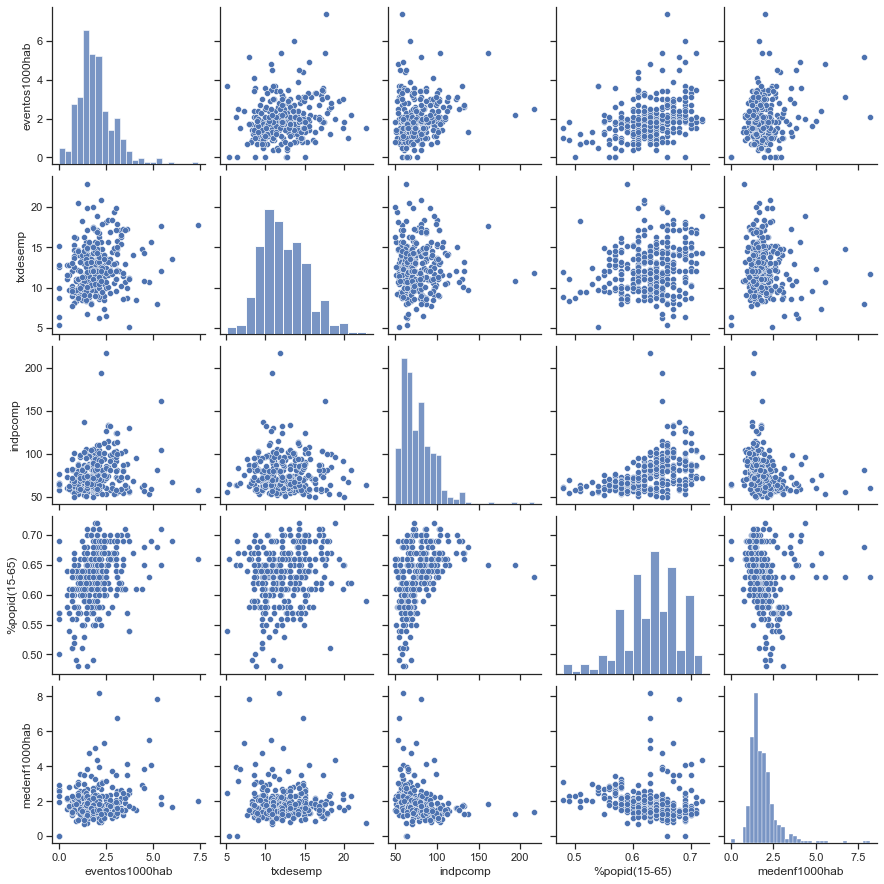

In [25]:
sns.set_theme(style="ticks")
sns.pairplot(sc)

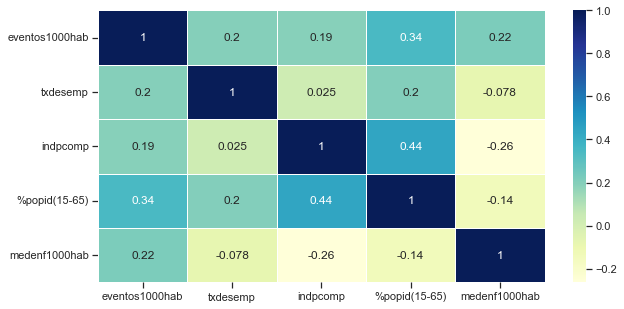

In [26]:
corrmsc=sc.corr()
plt.figure(figsize=(10,5))
ax = sns.heatmap(corrmsc, annot=True, linewidths=.5, cmap="YlGnBu")


plt.show()

In [27]:
X = sm.add_constant(x)
results = sm.OLS(y,X).fit()
results.summary()

C:\Users\m13ar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         eventos1000hab   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     27.57
Date:                Mon, 09 May 2022   Prob (F-statistic):           8.53e-16
Time:                        18:35:10   Log-Likelihood:                -404.21
No. Observations:                 308   AIC:                             816.4
Df Residuals:                     304   BIC:                             831.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.1128      0.731     -5.629      0.000      -5.550      -2.675
txdesemp          0.0517      0.018      2.889      0.004       0.016       0.087
%popid(15-65)     7.6725      1.132      6.776      0.000       5.444       9.901
medenf1000hab     0.3026      0.055      5.474      0.000       0.194       0.411
==============================================================================
Omnibus:                       85.368   Durbin-Watson:                   2.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.242
Skew:                           1.246   Prob(JB):                     2.05e-54
Kurtosis:                       6.613   Cond. No.                         333.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [30]:
reg.coef_

array([0.05168292, 7.6725251 , 0.3026498 ])

In [31]:
reg.intercept_

-4.11275195542882

In [32]:
reg.score(x,y)

0.21385690865481244

In [33]:
x.shape

(308, 3)

In [34]:
r2 = reg.score(x,y)

n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)

adjusted_r2

0.20609891762180066

In [35]:
from statsmodels.formula.api import poisson
from statsmodels.formula.api import negativebinomial
import math

In [36]:
sc.eventos1000hab.apply(np.ceil).astype(int)
x = df[['txdesemp', 'medenf1000hab']]

In [37]:
m1 = poisson('eventos1000hab ~ x', data = sc).fit() #+ indpcomp + %popid(15-65) + medenf/pop
print (m1.summary())


Optimization terminated successfully.
         Current function value: 1.464929
         Iterations 5
                          Poisson Regression Results                          
Dep. Variable:         eventos1000hab   No. Observations:                  308
Model:                        Poisson   Df Residuals:                      305
Method:                           MLE   Df Model:                            2
Date:                Mon, 09 May 2022   Pseudo R-squ.:                 0.01599
Time:                        18:35:10   Log-Likelihood:                -451.20
converged:                       True   LL-Null:                       -458.53
Covariance Type:            nonrobust   LLR p-value:                 0.0006540
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0336      0.199     -0.169      0.866      -0.424       0.357
x[0]           0.0378      0.

In [38]:
print(math.exp(0.03),math.exp(0.11))

1.030454533953517 1.1162780704588713


In [39]:
model_fit1 = sc
preds_1 = m1.predict()
model_fit1['preds'] = preds_1
model_fit1['erros'] = model_fit1.eventos1000hab - model_fit1.preds
print (model_fit1.head(5))


     eventos1000hab  txdesemp  indpcomp  %popid(15-65)  medenf1000hab  \
153             1.5      11.9      61.3           0.48       2.058460   
155             1.8      11.0      54.5           0.49       2.287927   
263             1.0       8.8      59.9           0.48       3.085362   
243             0.0      15.1      64.0           0.57       2.703515   
234             0.9      14.4      68.1           0.56       2.843602   

        preds     erros  
153  1.916698 -0.416698  
155  1.901803 -0.101803  
263  1.916913 -0.916913  
243  2.328028 -2.328028  
234  2.303833 -1.403833  


C:\Users\m13ar\AppData\Local\Temp/ipykernel_18452/4230587418.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_fit1['preds'] = preds_1
C:\Users\m13ar\AppData\Local\Temp/ipykernel_18452/4230587418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_fit1['erros'] = model_fit1.eventos1000hab - model_fit1.preds


<AxesSubplot:xlabel='erros', ylabel='Count'>

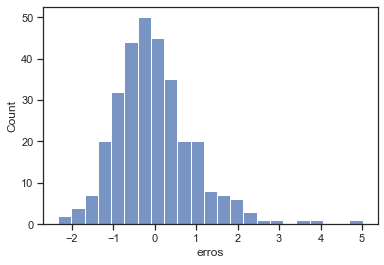

In [40]:
sns.histplot(data=model_fit1, x="erros")

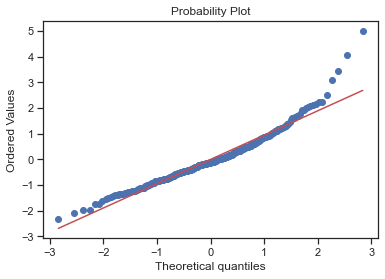

In [41]:
import scipy.stats as stats

stats.probplot(model_fit1.erros, dist="norm", plot=plt)
plt.show()

In [42]:
model_fit1.erros.skew()

1.0969560395526459

In [43]:
model_fit1.erros.kurt()

3.2072112452227457

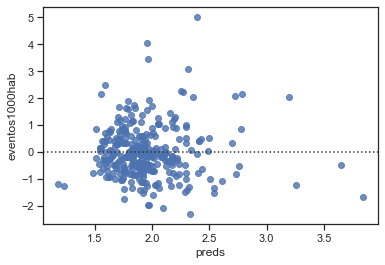

In [44]:
sns.residplot(x='preds', y='eventos1000hab', data=model_fit1)
  
plt.show()

In [48]:
#df9 = df[[ 'txdesemp', 'medenf1000hab']]
#x2 = df9
#sc2 = sc1.drop(columns = ["indpcomp"], axis=1)
#sc2

In [ ]:
#m2 = poisson('eventos1000hab ~ x2', data = sc2).fit() 
#print (m2.summary())

In [49]:
#model_fit1 = sc2
#preds_1 = m2.predict()
#model_fit1['preds'] = preds_1

#print (model_fit1.head(5))


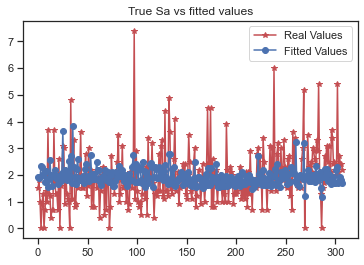

In [47]:
preds = m1.predict()
plt.plot(range(len(y)), y, 'r*-', range(len(y)), preds, 'bo-')
plt.title('True Sa vs fitted values')
plt.legend(['Real Values', 'Fitted Values'])
plt.show()

In [ ]:
#preds = m2.predict()
#plt.plot(range(len(y)), y, 'r*-', range(len(y)), preds, 'bo-')
#plt.title('True Sa vs fitted values')
#plt.legend(['Real Values', 'Fitted Values'])
#plt.show()